<a href="https://colab.research.google.com/github/kirtigarg38/Loan-_approval_prediction/blob/main/Loan__approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
bank_df = pd.read_csv("UniversalBank.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_df.shape

(5000, 14)

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
bank_df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


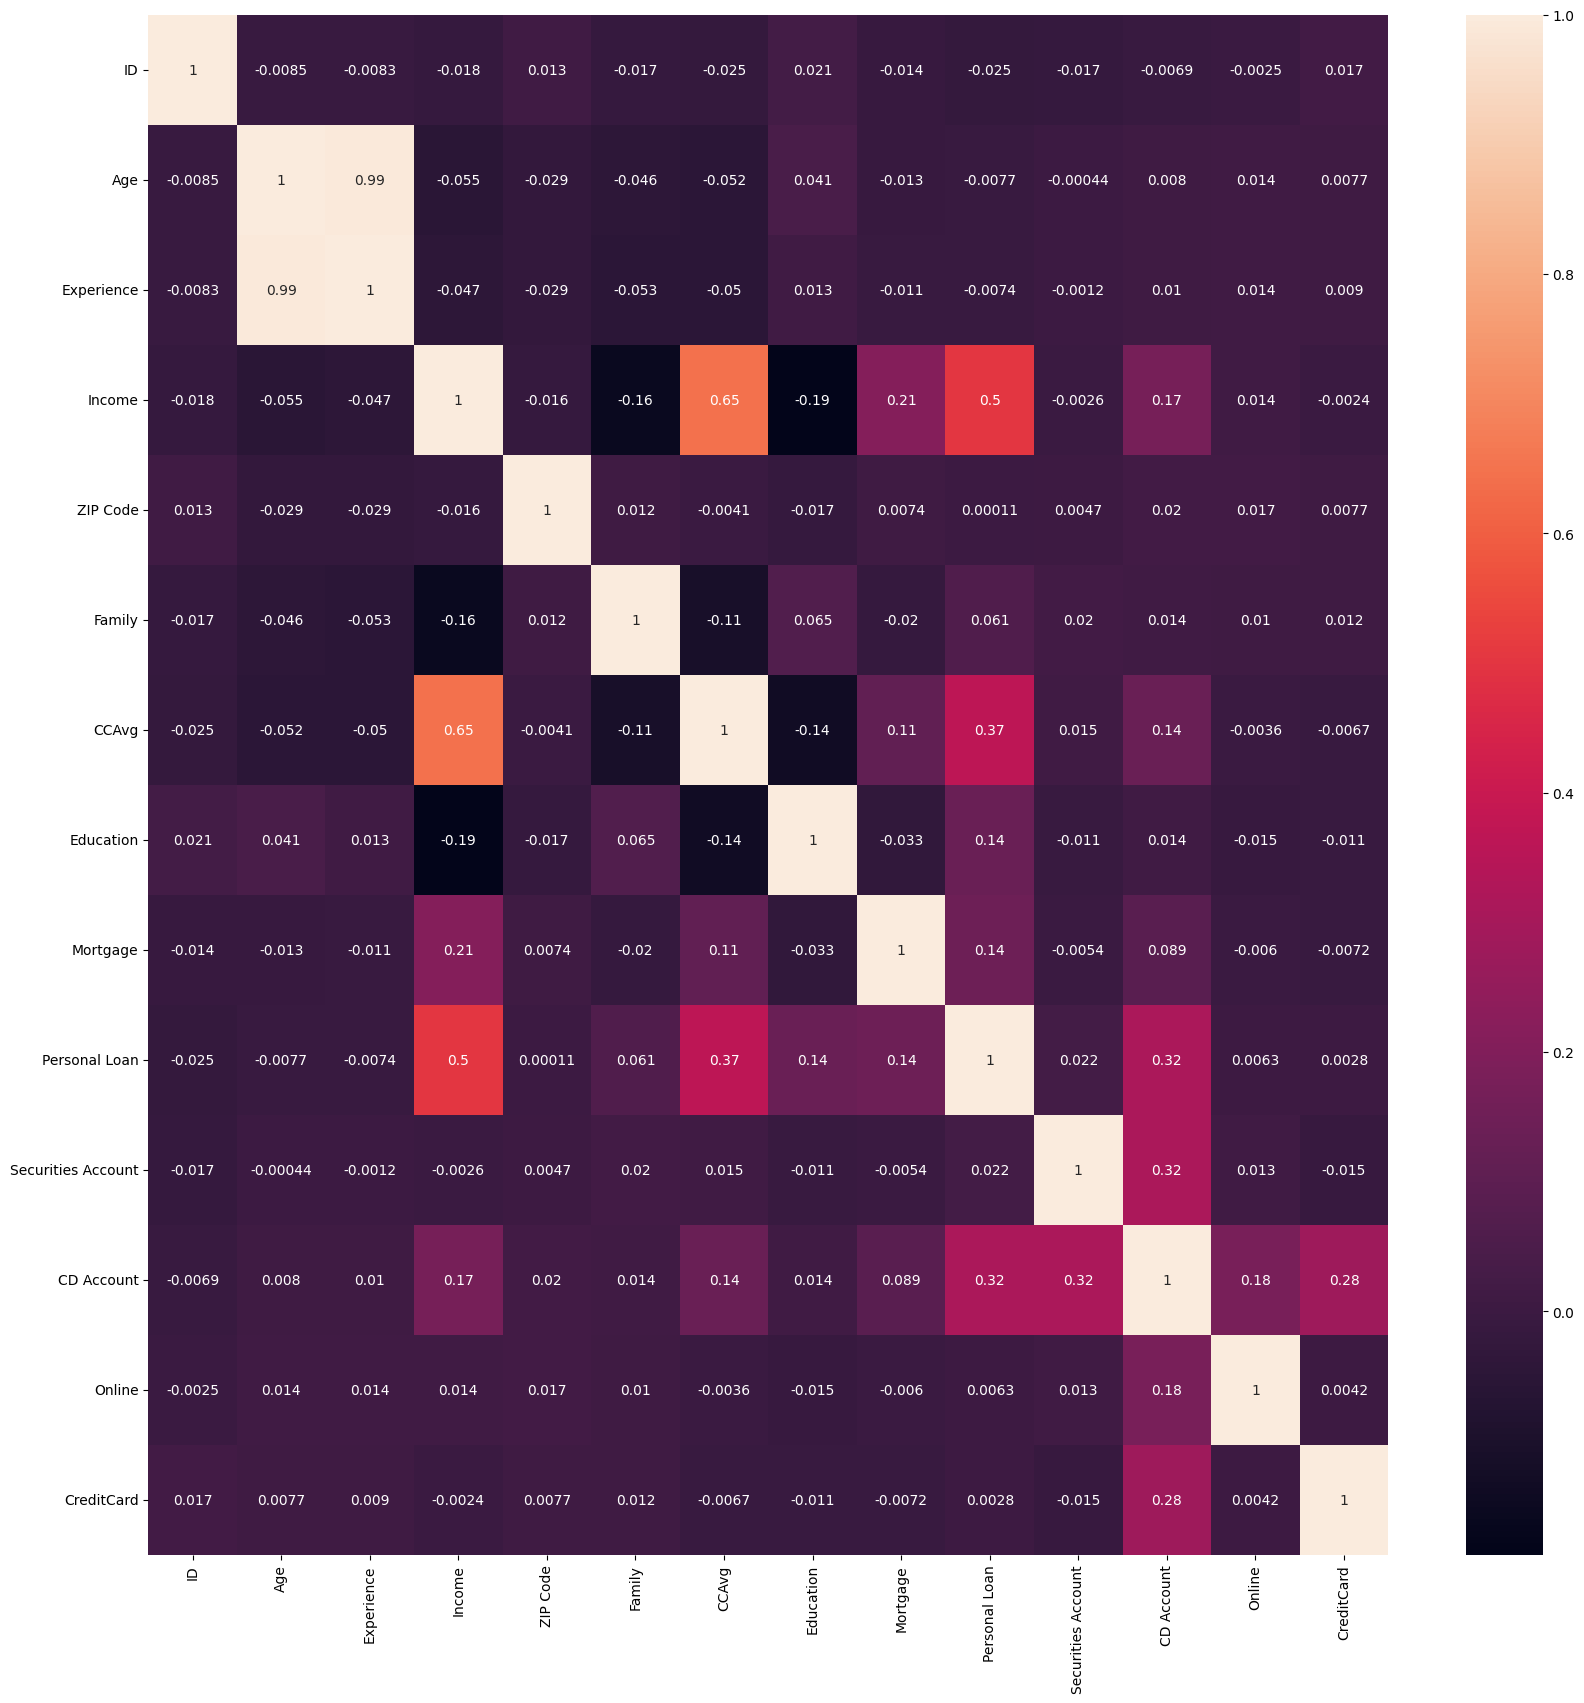

In [ ]:
cm = bank_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

y = to_categorical(y)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

In [ ]:
ann_model = keras.Sequential()

ann_model.add(Dense(250, input_dim=13, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

ann_model.add(Dense(1, activation='sigmoid'))
ann_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 250)                 │           3,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             502 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 755,752 (2.88 MB)

 Trainable params: 755,752 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# custom functions for f1, precision and recall

from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - f1_m: 0.9053 - loss: 0.2638 - val_f1_m: 0.9731 - val_loss: 0.1017
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - f1_m: 0.9703 - loss: 0.0888 - val_f1_m: 0.9779 - val_loss: 0.0700
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - f1_m: 0.9707 - loss: 0.0740 - val_f1_m: 0.9763 - val_loss: 0.0745
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - f1_m: 0.9690 - loss: 0.0884 - val_f1_m: 0.9784 - val_loss: 0.0753
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1_m: 0.9782 - loss: 0.0674 - val_f1_m: 0.9774 - val_loss: 0.0562
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - f1_m: 0.9836 - loss: 0.0553 - val_f1_m: 0.9763 - val_loss: 0.0744
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1_m: 0.9827 - loss: 0.0479 - val_f1_m: 0.9731 - val_loss: 0.0872
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1_m: 0.9804 - loss: 0.0668 - val_f1_m: 0.9838 - val_loss: 0.0561
Epoch 9/20
113/113 ━━━━━━━━━━━━━

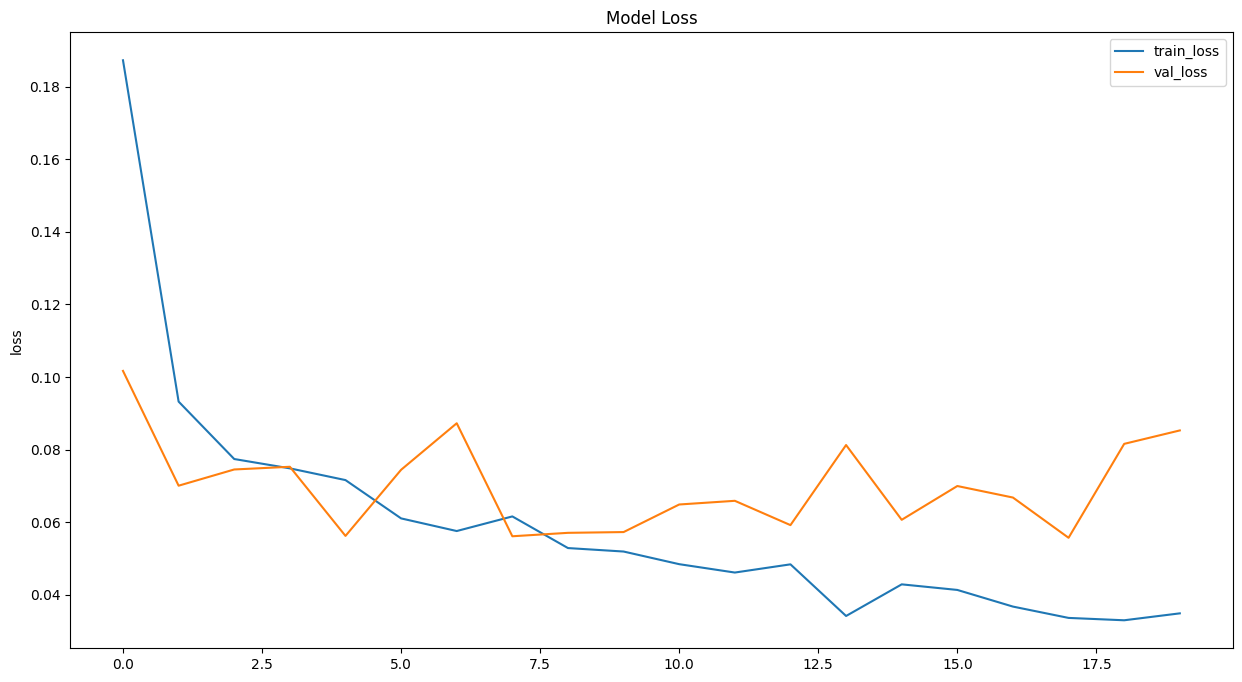

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
predictions = ann_model.predict(X_test)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
from sklearn import metrics
y_test = np.argmax(y_test, axis=1)

f1_test = metrics.f1_score(y_test, predict)
prec = metrics.precision_score(y_test, predict)
rec = metrics.recall_score(y_test, predict)
acc = metrics.accuracy_score(y_test, predict)

print ("F1 Score: {:.4f}.".format(f1_test))
print ("Precision: {:.4f}.".format(prec))
print ("Recall: {:.4f}.".format(rec))
print ("Accuracy: {:.4f}.".format(acc)) # note this is not a good measure of performance for this project as dataset is unbalanced.

F1 Score: 0.9263.
Precision: 0.9362.
Recall: 0.9167.
Accuracy: 0.9860.


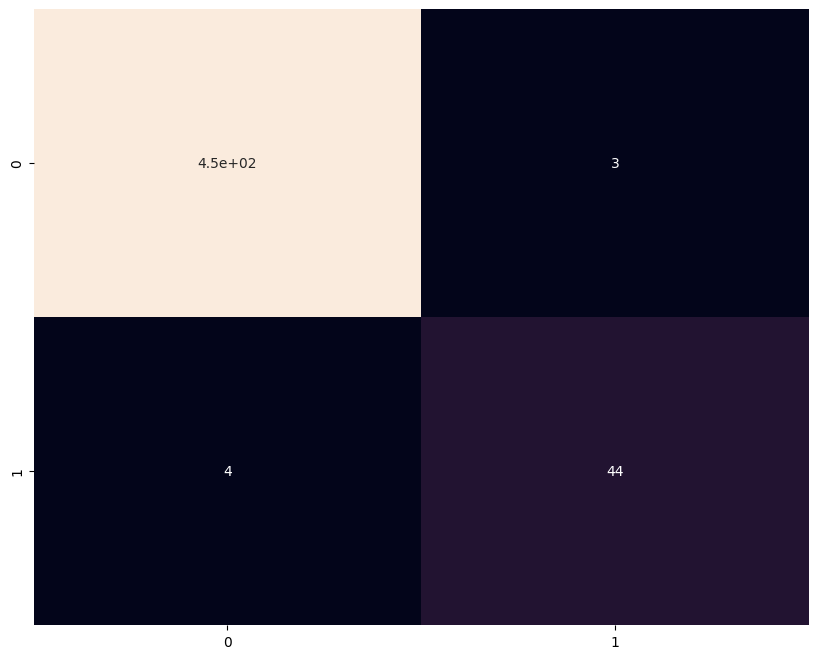

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       452
           1       0.94      0.92      0.93        48

    accuracy                           0.99       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.99      0.99      0.99       500

